Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,Location,Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
Institution Name,,,,,,,,,
MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,1,100.0,100.0,100.0,99.9,100.0,96.1,100.0
STANFORD UNIVERSITY,United States,2,100.0,100.0,100.0,99.4,99.6,72.7,98.7
HARVARD UNIVERSITY,United States,3,100.0,100.0,98.3,99.9,96.5,75.2,98.4
CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,4,99.5,85.4,100.0,100.0,93.4,89.2,97.7
UNIVERSITY OF CAMBRIDGE,United Kingdom,5,100.0,100.0,100.0,78.3,97.4,97.7,95.6
UNIVERSITY OF OXFORD,United Kingdom,6,100.0,100.0,100.0,76.3,98.6,98.5,95.3
UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,7,99.7,99.5,99.1,74.7,96.6,100.0,94.6
IMPERIAL COLLEGE LONDON,United Kingdom,8,99.4,100.0,100.0,68.7,100.0,100.0,93.7
UNIVERSITY OF CHICAGO,United States,9,99.9,92.9,96.5,85.9,71.9,79.8,93.5


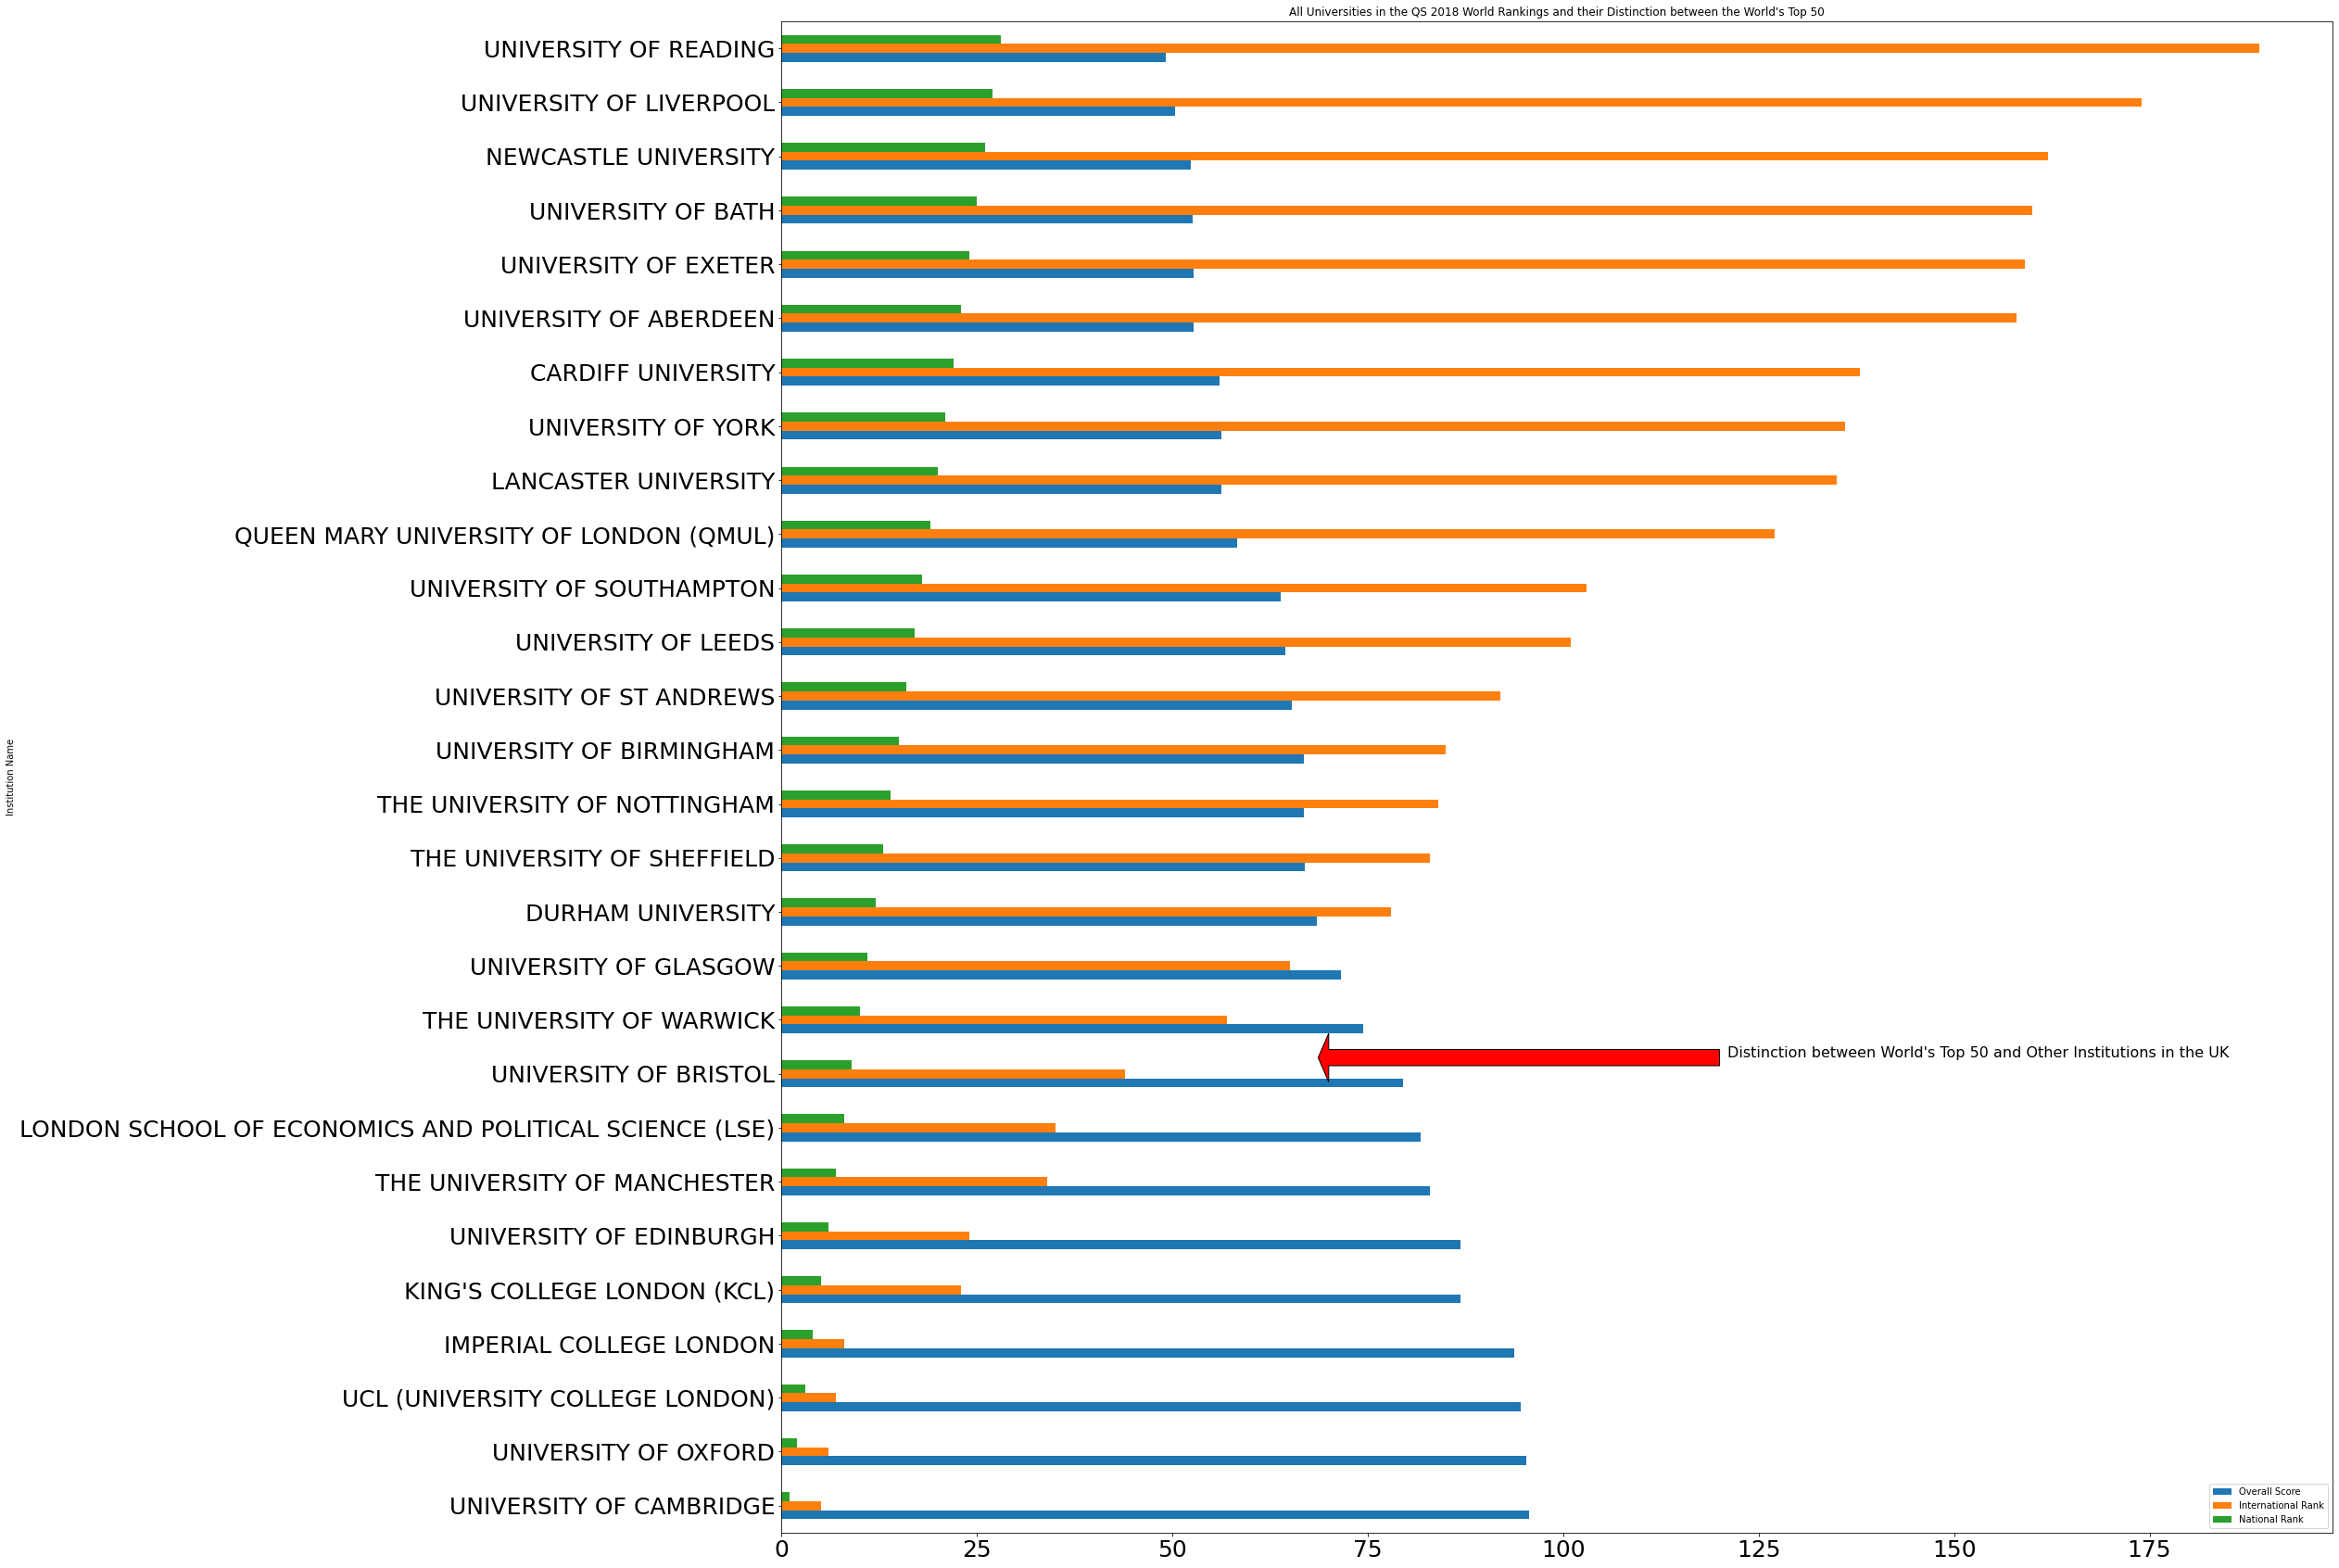

In [13]:
# CELL1 – 3 marks
################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

Rankings = pd.read_excel('2018-QS-World-University-Rankings-Top200.xlsx', index_col = 0)
RankingsDF = Rankings.dropna()
## Top 10 institutions in the world.
Rank = RankingsDF.head(10)
Rank 


## Graph
UKRank = RankingsDF[RankingsDF['Location'].str.contains('United Kingdom')]
x = UKRank.drop(columns=['Employer Reputation', 'Faculty Student', 'Academic Reputation', 'Citations per Faculty', 'International Students', 'International Faculty'])
x['International Rank'] = x['Rank']
a = x.drop(columns='Rank')
a['National Rank'] = a['International Rank'].rank(ascending=1)

## Plotting Horizontal bar chart
UKGraph = a.plot.barh(fontsize=25, xlabel="Institution Name", ylabel="Score, Rankings and Distinciton", figsize=(30,30), title="All Universities in the QS 2018 World Rankings and their Distinction between the World's Top 50")
plt.arrow(x=120, y=8.3, dx=-50, dy=0, width=0.3, facecolor='red', edgecolor='black')
plt.annotate("Distinction between World's Top 50 and Other Institutions in the UK", xy=(121, 8.3), fontsize=16)
Rank


<ipython-input-14-c4cf545a8438>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples_array = np.array(samples)


A p-value from each mean compared to it's adjacent one from the graph is calculated using the t-test. A p-value of less than 0.05 determines statistical significance. As all of my p-values lie above 0.05 there is no statistical difference between any two adjacent bars in the graph.


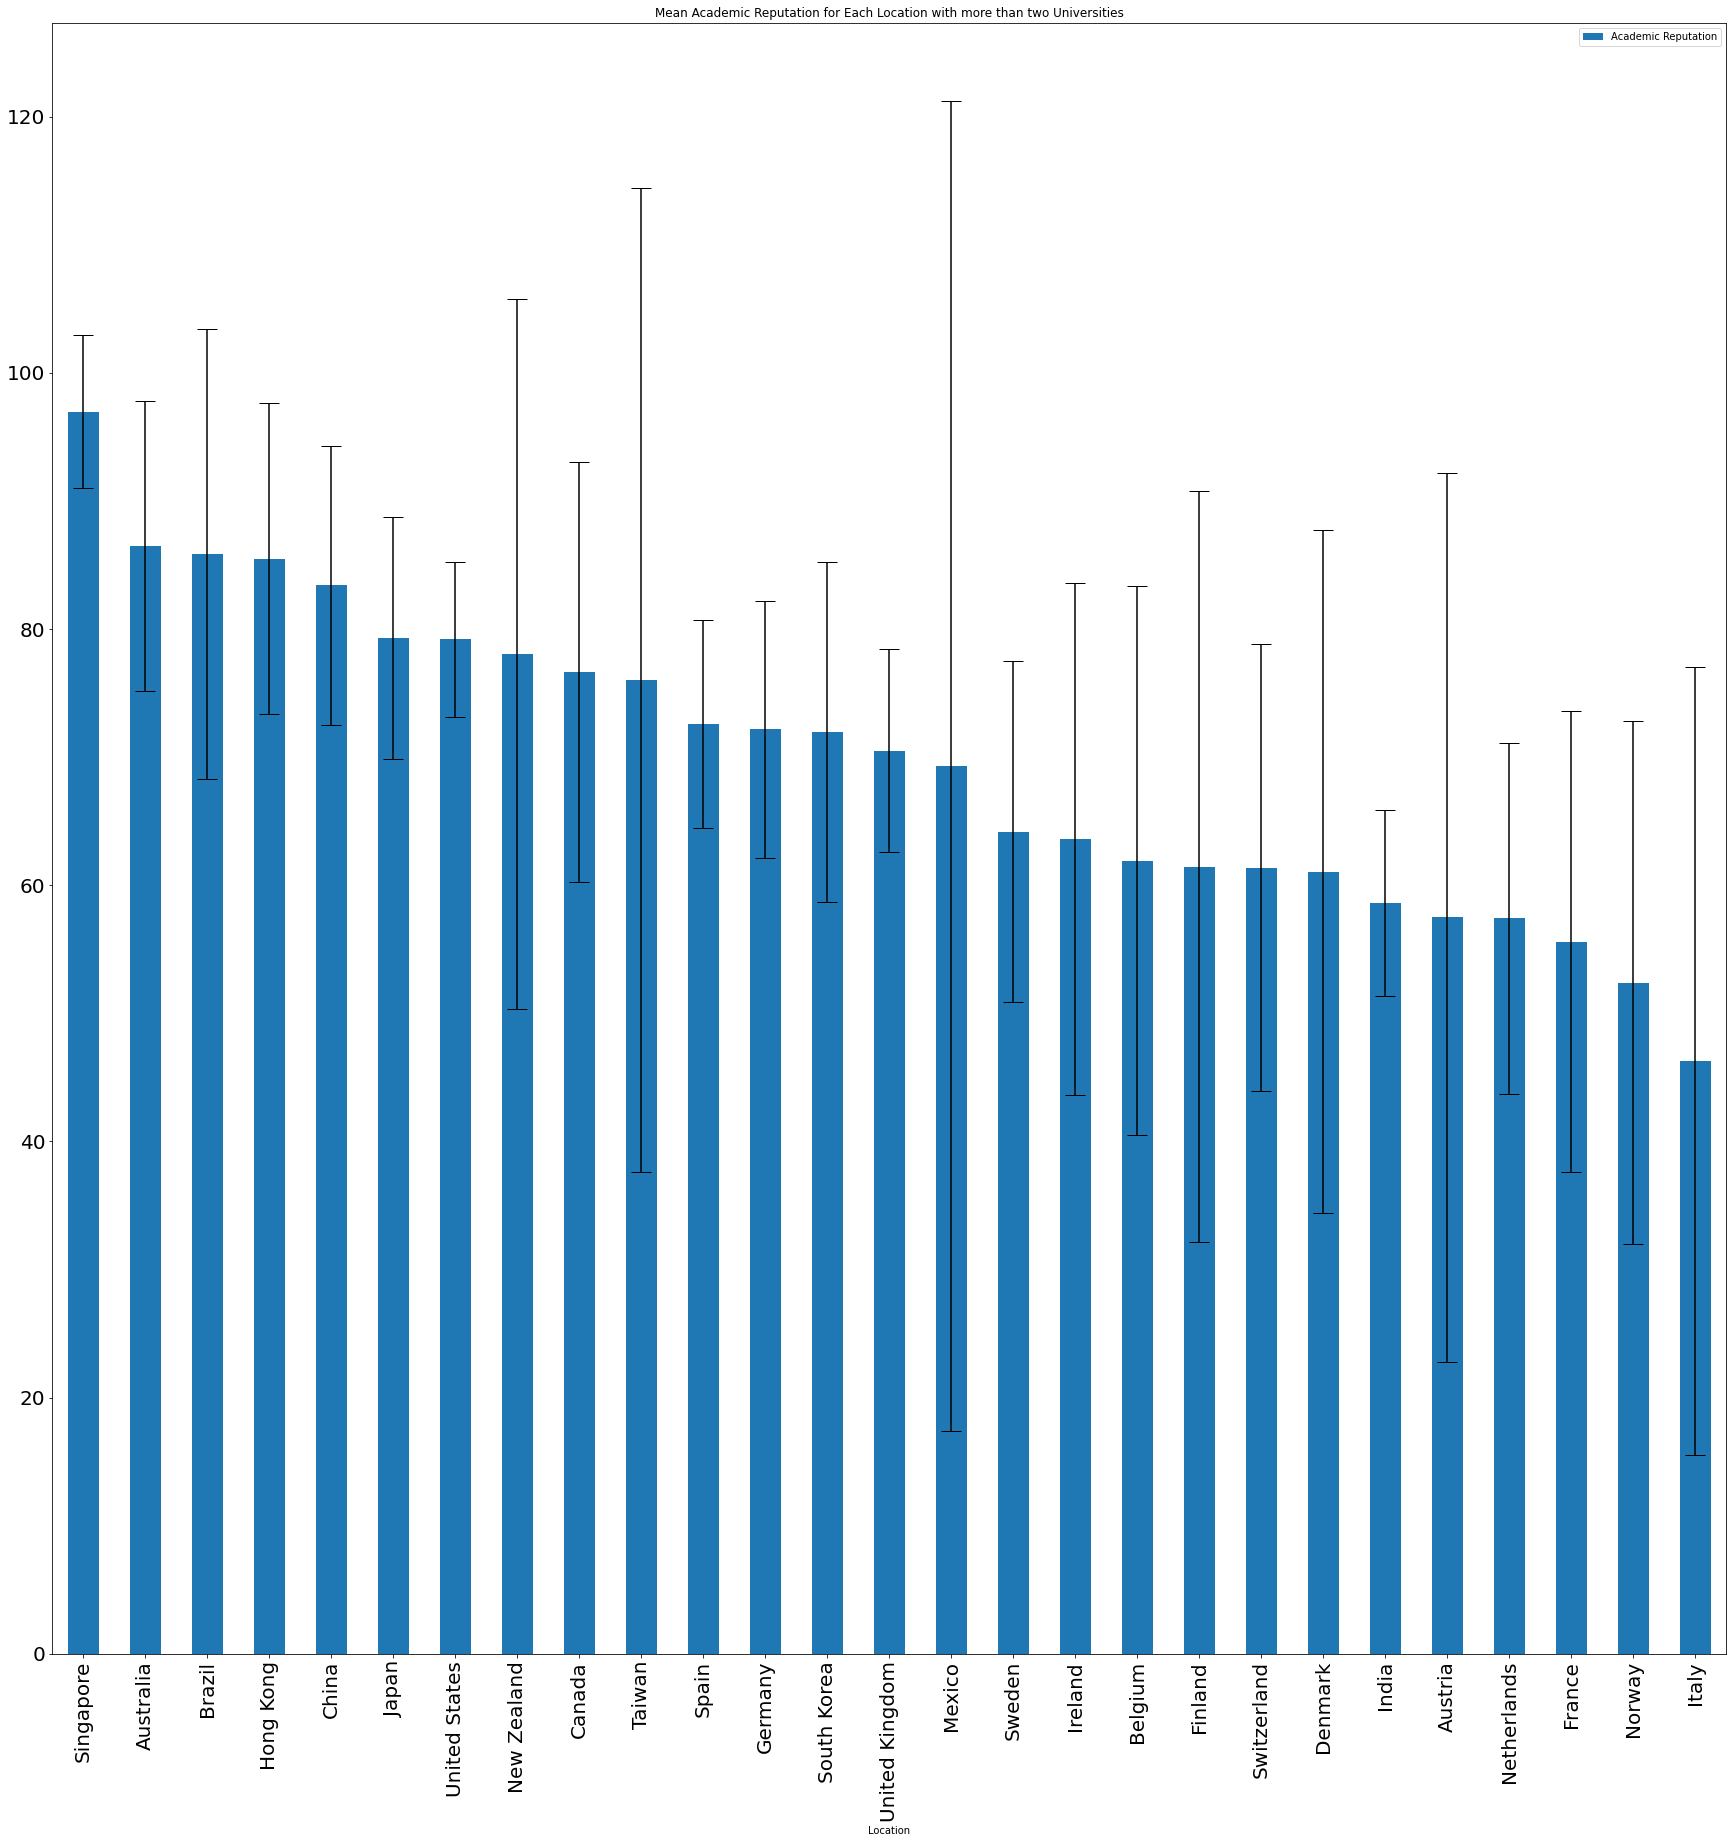

In [14]:
# CELL2 – 3 marks

import numpy as np

## Selecting the location and academic reputation columns and filtering out those that appear less than twice.
LocationFrame = RankingsDF.loc[:,['Location', 'Academic Reputation']]
b = LocationFrame.groupby('Location').filter(lambda x : len(x) >= 2)

count = b.groupby("Location")["Academic Reputation"].count()
size = LocationFrame.groupby('Location').size()
AcademicMean = b.groupby(['Location']).mean()
MeanAcademicReputation = AcademicMean.sort_values(by=['Academic Reputation'], ascending=False)

## Confidence Intervals at 95%
ConfidenceIntervals = b.groupby(['Location'])['Academic Reputation'].agg(['mean', 'std'])
ConfidenceIntervals["95% Confidence Intervals"] = 1.96 * ConfidenceIntervals['std']/sqrt(count)

## Plotting Graph
MeanAcademicReputation.plot.bar(title="Mean Academic Reputation for Each Location with more than two Universities", yerr=ConfidenceIntervals["95% Confidence Intervals"], capsize=10, figsize=(30,30), fontsize=20)

## Statistical Test - P Values
means = AcademicMean["Academic Reputation"].to_list()
z = b.groupby('Location')["Academic Reputation"].apply(list).reset_index(name="Academic Reputation")
z.insert(2,"mean",means)
z_sorted = z.sort_values(by='mean', ascending=False)
del z_sorted['Location']

samples = z_sorted.values.tolist()
samples_array = np.array(samples)
samples_array1 = array(samples, dtype=object)

for i in range(16):
    stats.ttest_ind(samples_array1[i][0], samples_array1[i + 1][0])

print("A p-value from each mean compared to it's adjacent one from the graph is calculated using the t-test. A p-value of less than 0.05 determines statistical significance. As all of my p-values lie above 0.05 there is no statistical difference between any two adjacent bars in the graph.")

In [15]:
# CELL3 – 4 marks

## Non-UK Institutions Dataframe
NonUKRank = RankingsDF[~Rankings['Location'].str.contains('United Kingdom')]

## UK Institution Dataframe
UKRankings = RankingsDF[RankingsDF['Location'].str.contains('United Kingdom')]

OS = NonUKRank["Overall Score"]

## Academic Reputation and Citations per Faculty
comb1 = NonUKRank[["Academic Reputation", "Citations per Faculty"]]
comb1 = sm.add_constant(comb1)
results1 = sm.OLS(OS, comb1).fit()
# print(results1.summary())
print("OS = 0.48 * AR + 0.20 * CF + 18.63") 

## Academic Reputation and Faculty/Student Ratio
comb2 = NonUKRank[["Academic Reputation", "Faculty Student"]]
comb2 = sm.add_constant(comb2)
results2 = sm.OLS(OS, comb2).fit()
# print(results2.summary())
print("OS = 0.52 * AR + 0.18 * FR + 17.56") 

## Faculty/Student Ratio and Citations per faculty
comb3 = NonUKRank[["Faculty Student", "Citations per Faculty"]]
comb3 = sm.add_constant(comb3)
results3 = sm.OLS(OS, comb3).fit()
# print(results3.summary())
print("OS = 0.20 * FR + 0.28 * CF + 36.74") 

## Academic Reputation, Faculty Student and Citations per Faculty
comb4 = NonUKRank[["Academic Reputation", "Faculty Student", "Citations per Faculty"]]
comb4 = sm.add_constant(comb4)
results4 = sm.OLS(OS, comb4).fit()
print("OS = 0.48 * AR + 0.21 * FR + 0.22 * CF + 4.73")

## Calculating MSE - Academic Reputation and Citations per Faculty
predicted_overall_score1 = 0.48 * UKRankings["Academic Reputation"] + 0.20 * UKRankings["Citations per Faculty"] + 18.63
real_overall_score = UKRankings["Overall Score"]
predicted_error1 = abs(predicted_overall_score1 - real_overall_score)**2
MSE_1 = mean(predicted_error1)

## Calculating MSE - Academic Reputation and Faculty/Student Ratio
predicted_overall_score2 = 0.52 * UKRankings["Academic Reputation"] + 0.18 * UKRankings["Faculty Student"] + 17.56
predicted_error2 = abs(predicted_overall_score2 - real_overall_score)**2
MSE_2 = mean(predicted_error2)

## Calculating MSE - Faculty/Student Ratio and Citations per Faculty
predicted_overall_score3 = 0.20 * UKRankings["Faculty Student"] + 0.28 * UKRankings["Citations per Faculty"] + 36.74
predicted_error3 = abs(predicted_overall_score3 - real_overall_score)**2
MSE_3 = mean(predicted_error3)

## Calculating MSE - Academic Reputation, Faculty Student and Citations per Faculty
predicted_overall_score4 = 0.48 * UKRankings["Academic Reputation"] + 0.21 * UKRankings["Faculty Student"] + 0.22 * UKRankings["Citations per Faculty"] + 4.73
predicted_error4 = abs(predicted_overall_score4 - real_overall_score)**2
MSE_4 = mean(predicted_error4)

## Constructing dataframe for performance
data = [["OS = 0.48 * AR + 0.20 * CF + 18.63", MSE_1], ["OS = 0.52 * AR + 0.18 * FR + 17.56", MSE_2], ["OS = 0.20 * FR + 0.28 * CF + 36.74", MSE_3], ["OS = 0.48 * AR + 0.21 * FR + 0.22 * CF + 4.73", MSE_4]]
performance_frame = pd.DataFrame(data, columns=["Model Equation", "MSE"])
print("To conclude I believe that the model that should be used to predict the overall score should be the model with AR and FR since it has the lowest mean squared error of 22.51.")
rounded_performance_frame = performance_frame.round(2)
rounded_performance_frame


OS = 0.48 * AR + 0.20 * CF + 18.63
OS = 0.52 * AR + 0.18 * FR + 17.56
OS = 0.20 * FR + 0.28 * CF + 36.74
OS = 0.48 * AR + 0.21 * FR + 0.22 * CF + 4.73
To conclude I believe that the model that should be used to predict the overall score should be the model with AR and FR since it has the lowest mean squared error of 22.51.


<ipython-input-15-277f19b4ccf3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NonUKRank = RankingsDF[~Rankings['Location'].str.contains('United Kingdom')]


,Model Equation,MSE
0,OS = 0.48 * AR + 0.20 * CF + 18.63,47.60
1,OS = 0.52 * AR + 0.18 * FR + 17.56,22.51
2,OS = 0.20 * FR + 0.28 * CF + 36.74,117.29
3,OS = 0.48 * AR + 0.21 * FR + 0.22 * CF + 4.73,26.14


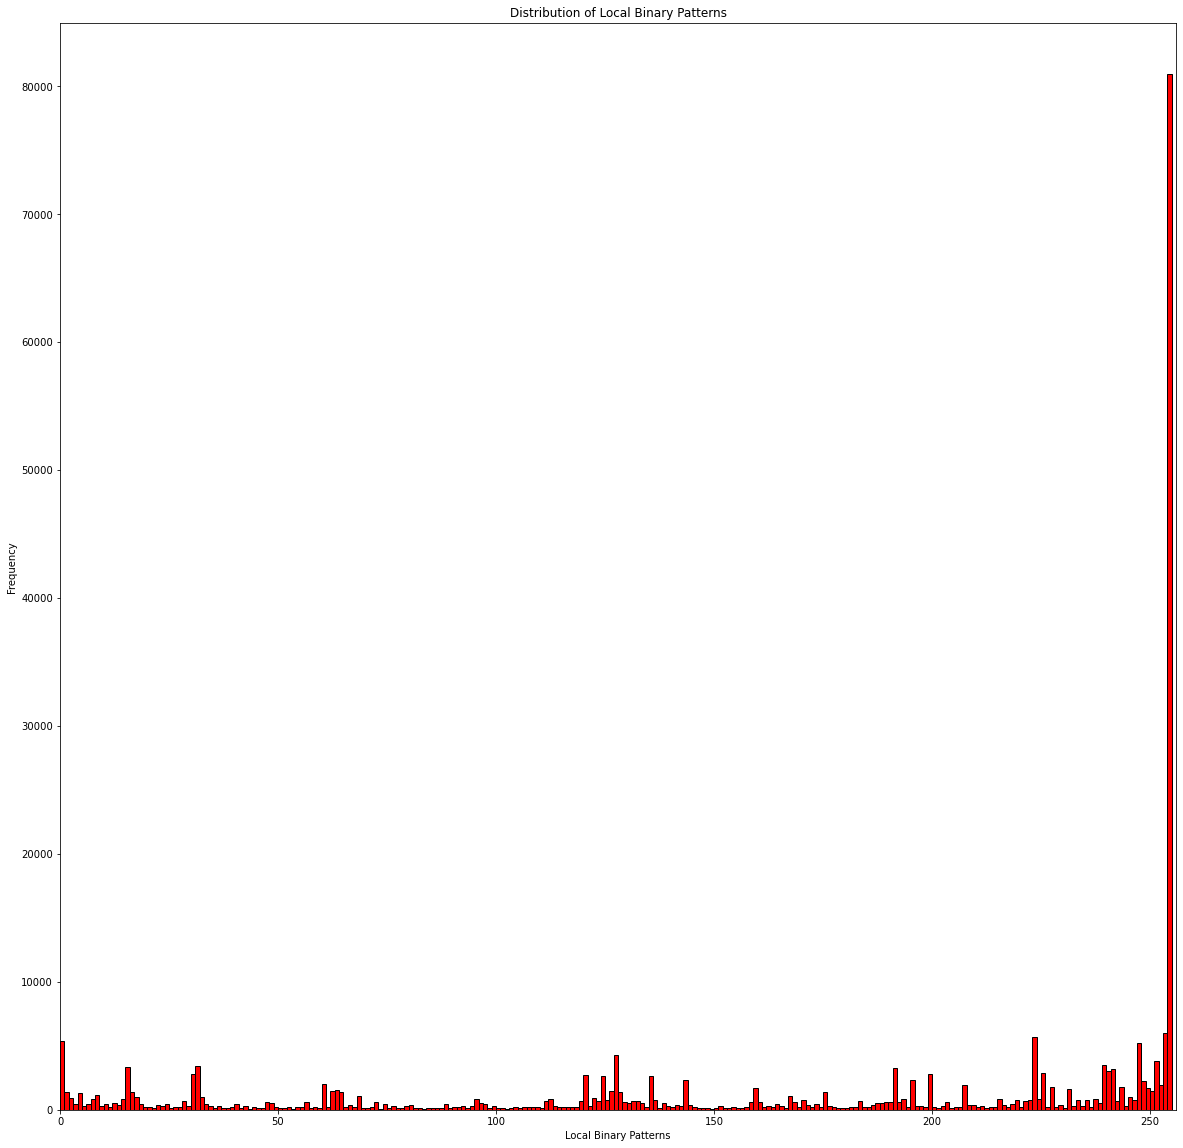

In [16]:
# CELL4 – 3 marks
## reading image
img1 = imread('m1.png')*255

def calc_histogram(image):
    ## examining each cell and adding to matrix array
    matrix=[]
    for i in range(0,510):
        for j in range(0,510):
            matrix.append(image[i:i+3, j:j+3])

    matrix_array = np.array(matrix)        
    int_matrix_array = matrix_array.astype(int)    
    decimal_numbers = []

    for i in range(0, len(matrix_array)):
        middle = int_matrix_array[i][1][1]
        current_matrix = int_matrix_array[i]
        binary_numbers = []

        ## get coordinate to compare by
        top_left = current_matrix[0][0] 
        top_middle = current_matrix[0][1]
        top_right = current_matrix[0][2]
        middle_right = current_matrix[1][2]
        bottom_right = current_matrix[2][2]
        bottom_middle = current_matrix[2][1]
        bottom_left = current_matrix[2][0]
        middle_left = current_matrix[1][0]    

        ## compare values
        if top_left >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if top_middle >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)    

        if top_right >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if middle_right >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if bottom_right >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if bottom_middle >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if bottom_left >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if middle_left >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        binary_array = np.array(binary_numbers)
        dec = binary_array.dot(1 << arange(binary_array.shape[-1] - 1, -1, -1)) ## converts each number to binary
        decimal_numbers.append(dec)
    
    decimal_array = np.array(decimal_numbers)
    unique, frequency = np.unique(decimal_array, return_counts = True)    
    fig = plt.figure(figsize=(20,20))
    plt.hist(decimal_array, bins=unique, color="red", edgecolor="black")
    plt.title("Distribution of Local Binary Patterns")
    plt.xlabel("Local Binary Patterns")
    plt.ylabel("Frequency")
    plt.xlim(0, 256)
    plt.show()

calc_histogram(img1)

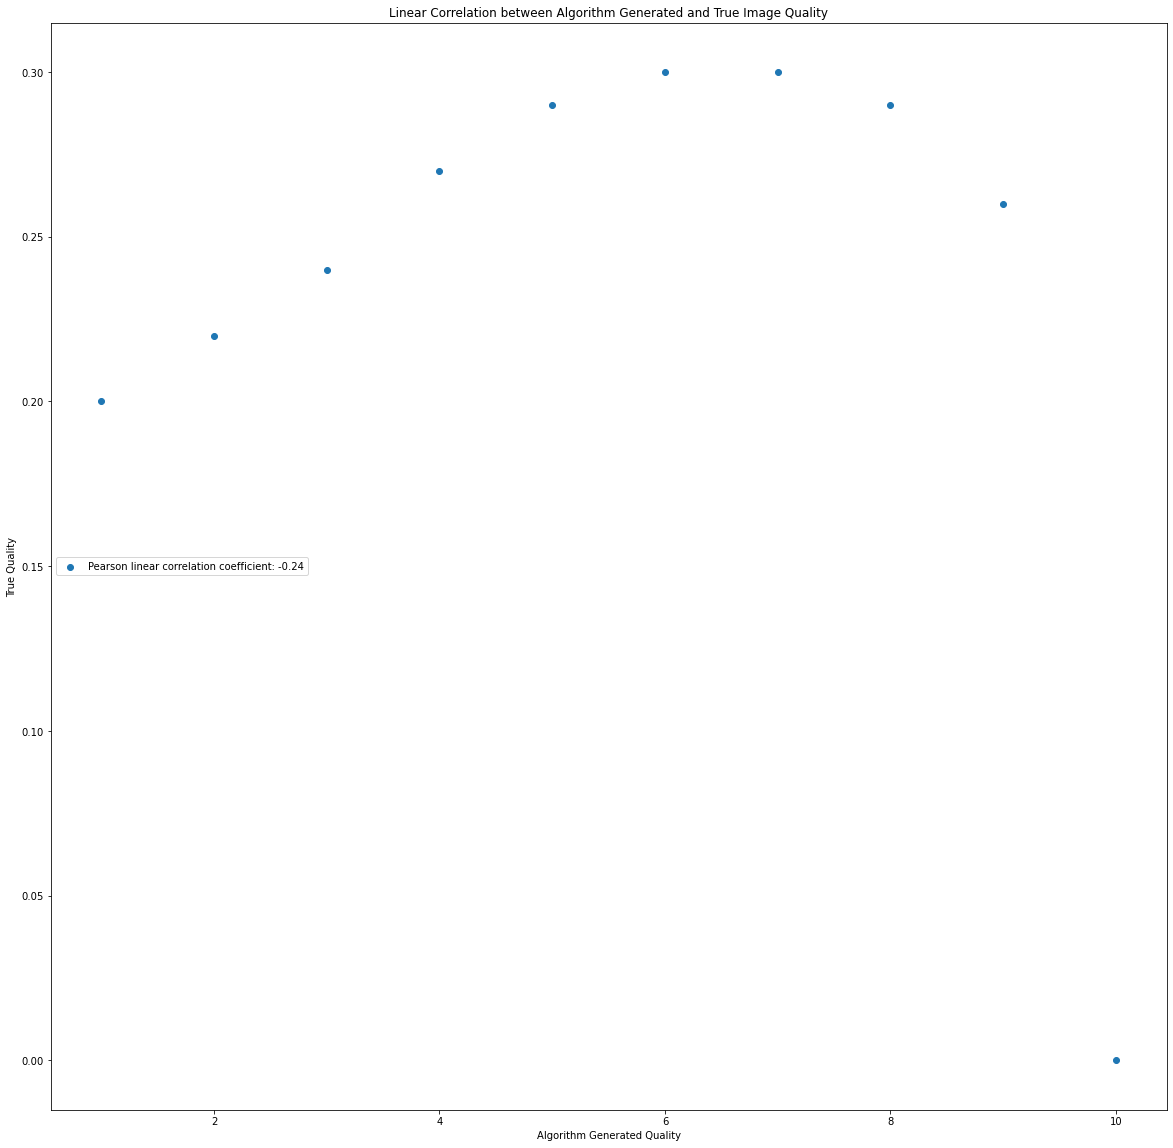

The Pearson Correlation Coefficient of -0.24 indicates that there is a negative correlation between the algorithm generated image quality and the true quality.


In [17]:
# CELL5 – 4 marks

## read images
reference_image = imread('m1.png')*255
m1 = imread('m1.png')*255
m2 = imread('m2.png')*255
m3 = imread('m3.png')*255
m4 = imread('m4.png')*255
m5 = imread('m5.png')*255
m6 = imread('m6.png')*255
m7 = imread('m7.png')*255
m8 = imread('m8.png')*255
m9 = imread('m9.png')*255
m10 = imread('m10.png')*255

def calc_normalised_histogram(image):
    ## examining each cell and adding to matrix array
    matrix=[]
    for i in range(0,510):
        for j in range(0,510):
            matrix.append(image[i:i+3, j:j+3])

    matrix_array = np.array(matrix)        
    int_matrix_array = matrix_array.astype(int)    
    decimal_numbers = []

    for i in range(0, len(matrix_array)):
        middle = int_matrix_array[i][1][1]
        current_matrix = int_matrix_array[i]
        binary_numbers = []

        ## get coordinate to compare by
        top_left = current_matrix[0][0] 
        top_middle = current_matrix[0][1]
        top_right = current_matrix[0][2]
        middle_right = current_matrix[1][2]
        bottom_right = current_matrix[2][2]
        bottom_middle = current_matrix[2][1]
        bottom_left = current_matrix[2][0]
        middle_left = current_matrix[1][0]    

        ## compare values
        if top_left >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if top_middle >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)    

        if top_right >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if middle_right >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if bottom_right >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if bottom_middle >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if bottom_left >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        if middle_left >= middle:
            binary_numbers.append(1)
        else:
            binary_numbers.append(0)

        binary_array = np.array(binary_numbers)
        dec = binary_array.dot(1 << arange(binary_array.shape[-1] - 1, -1, -1)) ## converts each number to binary
        decimal_numbers.append(dec)    
    plot_histogram(decimal_numbers)
    return plot_histogram(decimal_numbers)

    

def plot_histogram(decimal_numbers):
    decimal_array = np.array(decimal_numbers)
    
    normalized_values = [0]*256
    for i in decimal_array:
        normalized_values[i] += 1
        
    for i in range(len(normalized_values)):
        normalized_values[i] = normalized_values[i] / len(decimal_numbers)
        
    unique, frequency = np.unique(decimal_array, return_counts = True)    
    x = np.histogram(decimal_array, bins=unique, density=True)
    return normalized_values

def IQA_Quality_Assessor(im1, im2):
    x = 256
    ## Calculating Histograms
    h1 = calc_normalised_histogram(im1)
    h2 = calc_normalised_histogram(im2)
    
    ## Calculating euclidean distance of both histograms
    distance = 0
    for i in range(0, 256):
        distance += (h2[i] - h1[i])**2
    eu_dist = round(math.sqrt(distance),2)
    return eu_dist

Predicted_Score = []
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m1))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m2))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m3))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m4))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m5))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m6))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m7))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m8))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m9))
Predicted_Score.append(IQA_Quality_Assessor(reference_image, m10))

Actual_Score = pd.read_excel('Q_scores.xlsx', index_col = 0)
Actual_Score["Predicted Score"] = Predicted_Score
True_Quality = Actual_Score["Quality"] 
Correlation = str(round(stats.pearsonr(True_Quality, Predicted_Score)[0],2))

## Plotting Scatter Graph
fig = plt.figure(figsize=(20,20))
plt.scatter(True_Quality, Predicted_Score)
plt.title("Linear Correlation between Algorithm Generated and True Image Quality")
plt.xlabel("Algorithm Generated Quality")
plt.ylabel("True Quality")
plt.legend(["Pearson linear correlation coefficient: " + Correlation], loc="center left")
plt.show()

print("The Pearson Correlation Coefficient of", Correlation, "indicates that there is a negative correlation between the algorithm generated image quality and the true quality.")

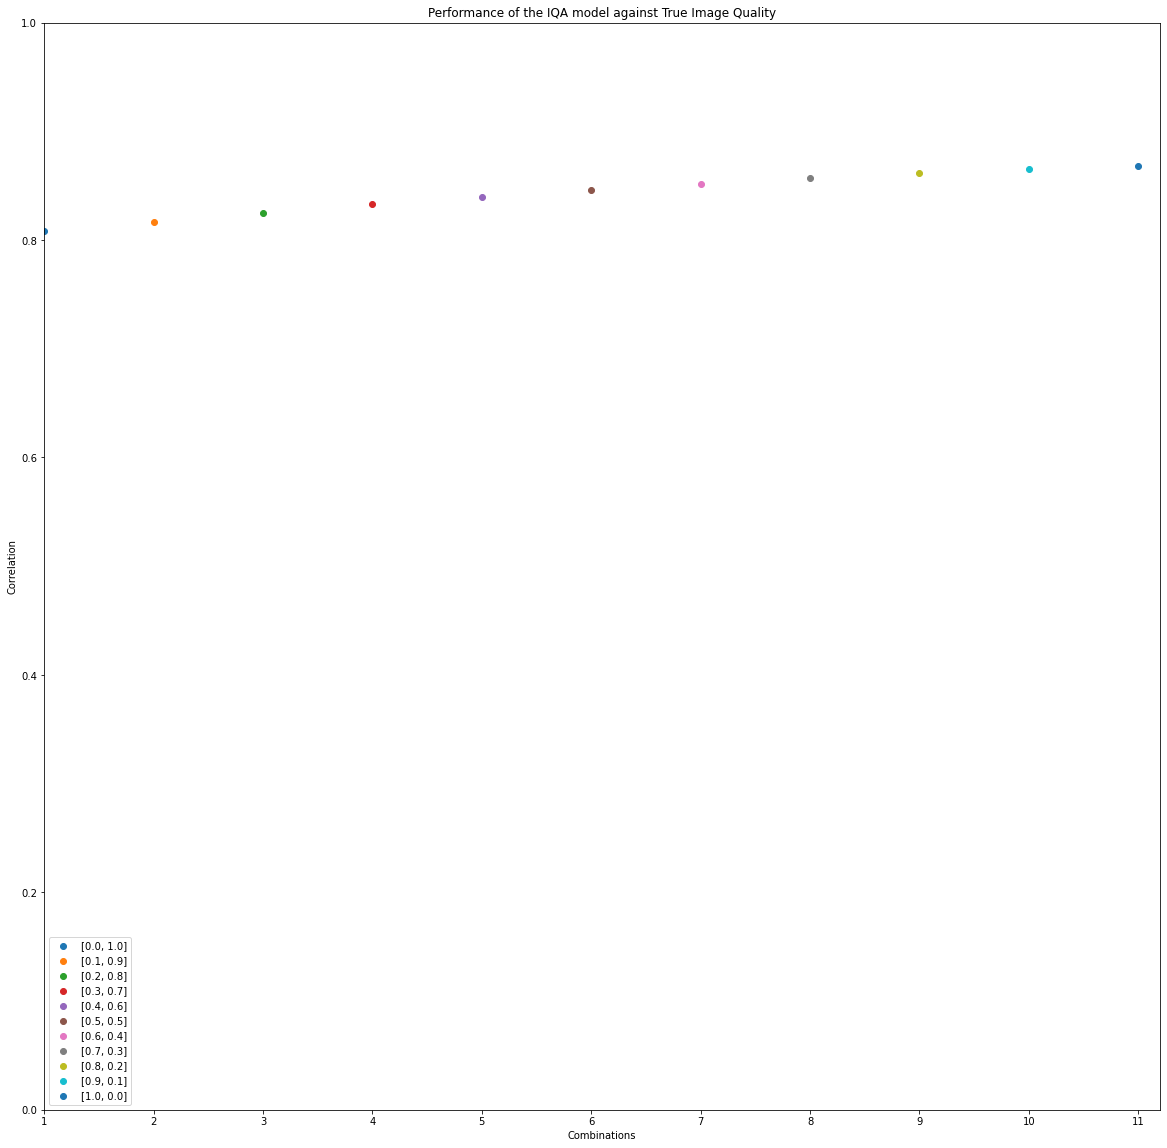

In [18]:
# CELL6 – 3 marks
m1 = imread('m1.png')*255
m2 = imread('m2.png')*255
m3 = imread('m3.png')*255
m4 = imread('m4.png')*255
m5 = imread('m5.png')*255
m6 = imread('m6.png')*255
m7 = imread('m7.png')*255
m8 = imread('m8.png')*255
m9 = imread('m9.png')*255
m10 = imread('m10.png')*255
listab = [0.0, 1.0], [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1], [1.0, 0.0], 


def Alternate_IQA(test_image):
    AP = round(mean(test_image), 2) ## mean pixel intensity - 175.25
    MP = round(median(test_image), 2) ## 196.0
    IQ = 0
    IQp = []
    listab = [0.0, 1.0], [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1], [1.0, 0.0], 

    for a, b in listab:
        IQ = a * AP + b * MP
        IQ1 = round(IQ,2)
        IQp.append(IQ1)
           
    return IQp

IQp_Results = []
IQp_Results.append(Alternate_IQA(m1))
IQp_Results.append(Alternate_IQA(m2))
IQp_Results.append(Alternate_IQA(m3))
IQp_Results.append(Alternate_IQA(m4))
IQp_Results.append(Alternate_IQA(m5))
IQp_Results.append(Alternate_IQA(m6))
IQp_Results.append(Alternate_IQA(m7))
IQp_Results.append(Alternate_IQA(m8))
IQp_Results.append(Alternate_IQA(m9))
IQp_Results.append(Alternate_IQA(m10))

Actual_Score = pd.read_excel('Q_scores.xlsx', index_col = 0)
True_Scores = Actual_Score["Quality"]

com1 = [x[0] for x in IQp_Results]
com2 = [x[1] for x in IQp_Results] 
com3 = [x[2] for x in IQp_Results]
com4 = [x[3] for x in IQp_Results] 
com5 = [x[4] for x in IQp_Results] 
com6 = [x[5] for x in IQp_Results]
com7 = [x[6] for x in IQp_Results] 
com8 = [x[7] for x in IQp_Results]
com9 = [x[8] for x in IQp_Results] 
com10 = [x[9] for x in IQp_Results]
com11 = [x[10] for x in IQp_Results] 

Correlations = []
Correlations.append(stats.pearsonr(com1, True_Scores)[0]) ## 0.0, 1.0
Correlations.append(stats.pearsonr(com2, True_Scores)[0]) ## 0.1, 0.9
Correlations.append(stats.pearsonr(com3, True_Scores)[0]) ## 0.2, 0.8
Correlations.append(stats.pearsonr(com4, True_Scores)[0]) ## 0.3, 0.7
Correlations.append(stats.pearsonr(com5, True_Scores)[0]) ## 0.4, 0.6
Correlations.append(stats.pearsonr(com6, True_Scores)[0]) ## 0.5, 0.5
Correlations.append(stats.pearsonr(com7, True_Scores)[0]) ## 0.6, 0.4
Correlations.append(stats.pearsonr(com8, True_Scores)[0]) ## 0.7, 0.3
Correlations.append(stats.pearsonr(com9, True_Scores)[0]) ## 0.8, 0.2
Correlations.append(stats.pearsonr(com10, True_Scores)[0]) ## 0.9, 0.1
Correlations.append(stats.pearsonr(com11, True_Scores)[0]) ## 1.0, 0.0


combs = [1,2,3,4,5,6,7,8,9,10,11]
fig = plt.figure(figsize=(20,20))
for x, y in zip(combs, Correlations):
    plt.scatter(x, y)

plt.xlim([1,11.2])
plt.ylim([0.0, 1.0])
plt.title("Performance of the IQA model against True Image Quality")
plt.xlabel("Combinations")
plt.ylabel("Correlation")
plt.xticks(combs)
plt.legend(listab, loc="lower left")
plt.show()


In [19]:
import scipy
print(scipy.__version__)

1.6.2
